### 1. EDA for Benin 
Physics First: What Are We Measuring?

What each variable means in the real world.

#### Solar Radiation Components

Solar energy arrives at Earth in three physically distinct ways:

Variable	Physics meaning
GHI (Global Horizontal Irradiance)	Total solar power per m² on a horizontal surface
DNI (Direct Normal Irradiance)	Sunlight coming directly from the sun
DHI (Diffuse Horizontal Irradiance)	Sunlight scattered by atmosphere

Key physical law:

GHI= DNI⋅cos(𝜃) + DHI
GHI=DNI⋅cos(θ)+DHI

If the data violates this relationship badly → sensor or data error

#### Temperature & Atmosphere
Variable	    Physics role
Tamb	        Ambient air temperature
TModA / TModB	Solar panel temperature
RH	            Relative humidity (affects scattering & cooling)
BP	            Atmospheric pressure
WS / WSgust	    Wind speed (panel cooling, sensor vibration)
WD	            Wind direction

#### 1 Load the data

##### 1.1 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#plt.style.use("seaborn-darkgrid")
plt.style.use("seaborn-v0_8")

##### 1.2 Load Raw CSV

In [ ]:
df = pd.read_csv("../data/raw/benin-malanville.csv")


##### 1.3 First Structural Inspection

In [ ]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
# 525,600=365×24×60 This is minute-level data for one full year

##### 1.4 Timestamp 
It is object and need to parse it into datetime for analysis


In [ ]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
pd.to_datetime(df['Timestamp'], errors='coerce')

0        2021-08-09 00:01:00
1        2021-08-09 00:02:00
2        2021-08-09 00:03:00
3        2021-08-09 00:04:00
4        2021-08-09 00:05:00
                 ...        
525595   2022-08-08 23:56:00
525596   2022-08-08 23:57:00
525597   2022-08-08 23:58:00
525598   2022-08-08 23:59:00
525599   2022-08-09 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

In [ ]:
df.set_index('Timestamp', inplace=True)


In [ ]:
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


#### 2. Summary Statistics

##### 2.1 Numeric Summary

In [26]:
df.describe().style.set_sticky(axis="index")

NameError: name 'df' is not defined

##### 2.2 Missing Values 

In [ ]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100

missing_report = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)
missing_report

,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


##### 2.3 Flag Columns with > 5% missing

In [ ]:
# if <5% → safe to impute (low bias)
high_missing_cols = missing_report[missing_report['missing_percent'] > 5]
high_missing_cols

,missing_count,missing_percent
Comments,525600,100.0


#### 3. The underlying Physics for the Data 

| Column | Physical Meaning       | Expected Range  | Why It Matters |
| ------ | ---------------------- | --------------- | -------------- |
| GHI    | Total solar irradiance | 0–1200 W/m²     | Site ranking   |
| DNI    | Direct sun radiation   | 0–1000 W/m²     | CSP potential  |
| DHI    | Scattered radiation    | 0–500 W/m²      | Cloudiness     |
| ModA/B | Panel output           | ≥0              | Performance    |
| WS     | Wind speed             | 0–20 m/s        | Cooling        |
| WSgust | Wind spikes            | ≥ WS            | Stress         |
| RH     | Humidity               | 0–100%          | Scattering     |
| Tamb   | Air temp               | realistic local | Efficiency     |

* CSP potential = how suitable a location is for Concentrated Solar Power

#### 4. Outlier Detection & Basic Cleaning

##### 4.1 Select Physics-Critical Variables
 Z-score should NOT be used when:
Distribution is bounded (RH: 0–100)
Variable is circular (WD: 0–360)
Distribution is highly skewed by design
That’s why we exclude WD, RH, BP.

In [ ]:
key_cols = [
    "GHI", "DNI", "DHI",
    "ModA", "ModB",
    "WS", "WSgust"
]

##### 4.2 Compute Z-Scores (NO DELETION)

In [ ]:
from scipy.stats import zscore

z_scores = df[key_cols].apply(zscore)

##### 4.3 Flag Outliers 


In [ ]:
df["z_outlier"] = (z_scores.abs() > 3).any(axis=1).astype(int)

In [ ]:
# Outlier count and Rate
# “Outliers are flagged using a ±3σ Z-score rule on physically meaningful variables.
df["z_outlier"].value_counts(normalize=True) * 100

z_outlier
0    98.527397
1     1.472603
Name: proportion, dtype: float64

#### 5. Physics based correction
Solar radiation cannot be negative

In [ ]:
# Count negative values for each column
solar_cols = ["GHI", "DNI", "DHI"]
for col in solar_cols:
    neg_count = (df[col] < 0).sum()
    print(f"Column '{col}' has {neg_count} negative values")

Column 'GHI' has 258847 negative values
Column 'DNI' has 275987 negative values
Column 'DHI' has 259182 negative values


In [ ]:
# Clip negative values to zero
#Any physically bounded sensor (radiation ≥0, humidity 0–100%) → clip values.
# Do not delete rows blindly, especially when they represent a natural zero state.
for col in solar_cols:
    df[col] = df[col].clip(lower=0)

##### 5.3 Create a Unified Cleaning Flag

In [ ]:
df["clean_flag"] = ((df["Cleaning"] == 1) | (df["z_outlier"] == 1)).astype(int)
df["clean_flag"].value_counts(normalize=True) * 100

clean_flag
0    98.435312
1     1.564688
Name: proportion, dtype: float64

##### 5.4 Export the clean Data

In [ ]:
import os 
if not os.path.exists("../data"):
    os.makedirs("../data")

In [2]:
df.reset_index().to_csv("../data/benin_clean.csv", index=False)


NameError: name 'df' is not defined

#### 6. Time-Series Solar Physics 

In [8]:
cleaned_df = pd.read_csv("../data/benin_clean.csv")
cleaned_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,z_outlier,clean_flag
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,...,122.1,0.0,998,0,0.0,26.3,26.2,NaN,0,0
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,0.0,998,0,0.0,26.3,26.2,NaN,0,0
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,...,124.6,1.5,997,0,0.0,26.4,26.2,NaN,0,0
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,...,120.3,1.3,997,0,0.0,26.4,26.3,NaN,0,0
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,...,113.2,1.0,997,0,0.0,26.4,26.3,NaN,0,0


##### 6.1 Ensure Timestamp Index 

In [10]:
# Ensure Timestamp is datetime
cleaned_df['Timestamp'] = pd.to_datetime(cleaned_df['Timestamp'], format='%Y-%m-%d %H:%M')

# Set Timestamp as index
cleaned_df.set_index('Timestamp', inplace=True)


C:\Users\ssss\AppData\Local\Temp\ipykernel_8792\192557379.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = cleaned_df[["GHI","DHI","Tamb"]].resample("H").mean()


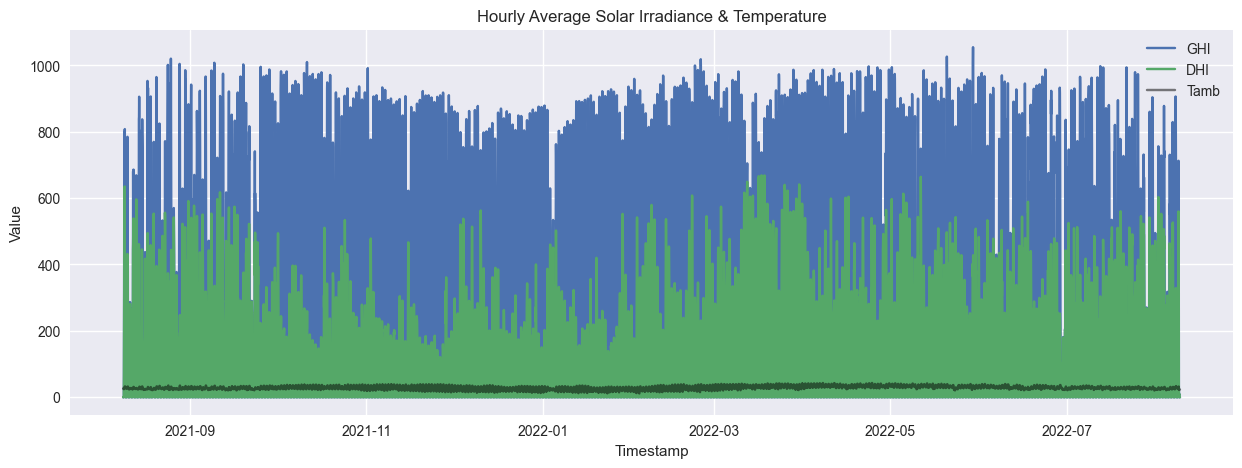

In [11]:
df_hourly = cleaned_df[["GHI","DHI","Tamb"]].resample("H").mean()

plt.figure(figsize=(15,5))
plt.plot(df_hourly.index, df_hourly["GHI"], label="GHI")
plt.plot(df_hourly.index, df_hourly["DHI"], label="DHI")
plt.plot(df_hourly.index, df_hourly["Tamb"], label="Tamb", color="black", alpha=0.5)
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Hourly Average Solar Irradiance & Temperature")
plt.legend()
plt.show()


##### 6.2 Daily Patterns (Diurnal Cycle)
highlights peak generation hours

Text(0.5, 1.0, 'Average Hourly Solar Irradiance and Temperature')

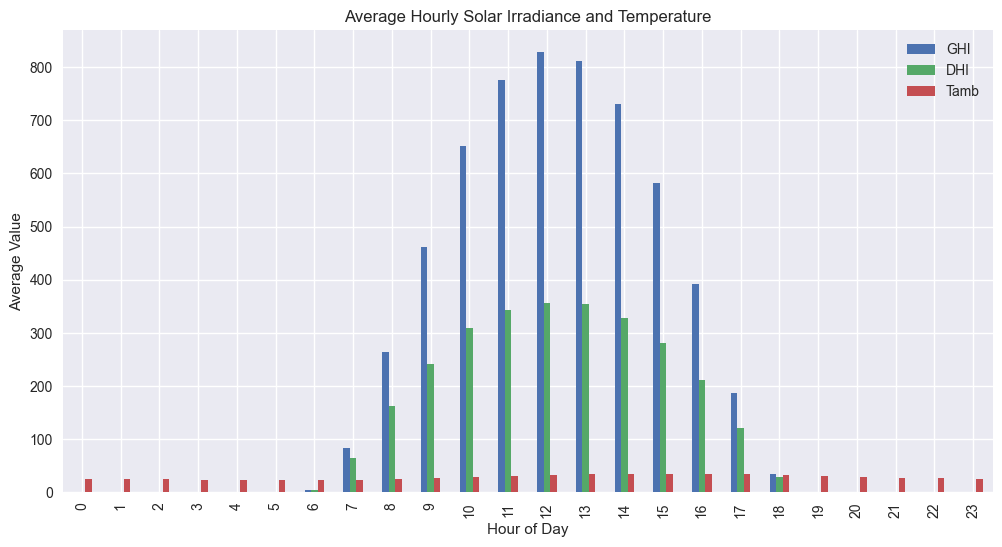

In [12]:
hourly_avg = cleaned_df.groupby(cleaned_df.index.hour)[["GHI", "DHI", "Tamb"]].mean()

hourly_avg.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.title("Average Hourly Solar Irradiance and Temperature")

##### 6.3 Monthly /Seasonal Trends
informs energy planning

C:\Users\ssss\AppData\Local\Temp\ipykernel_8792\2936094609.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = cleaned_df.resample('M')[["GHI", "DHI", "Tamb"]].mean()


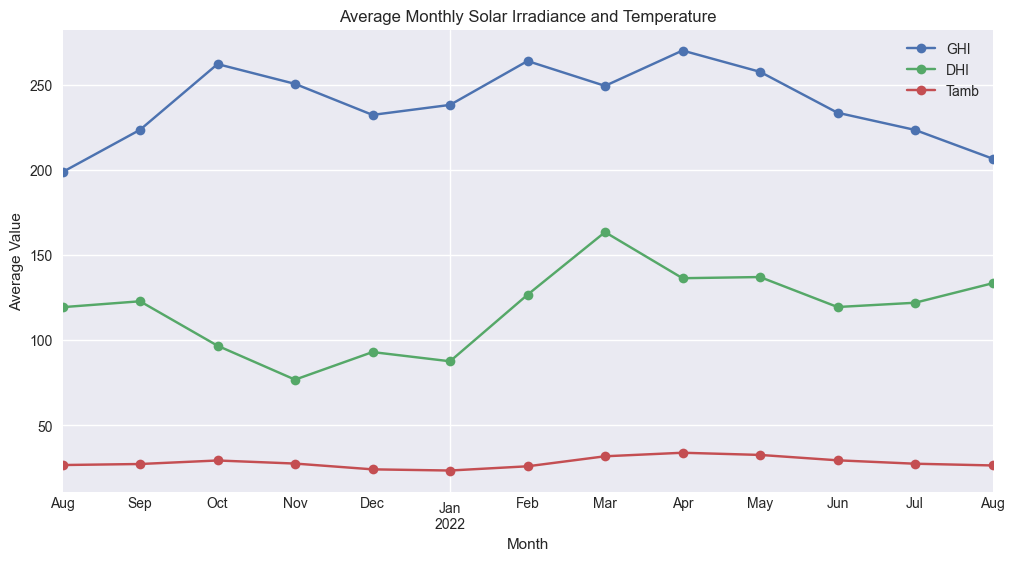

In [13]:
monthly_avg = cleaned_df.resample('M')[["GHI", "DHI", "Tamb"]].mean()
monthly_avg.plot( figsize=(12, 6), marker='o')
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.title("Average Monthly Solar Irradiance and Temperature")
plt.show()

#### 7. Cleaning Impact on ModA & ModB
See how cleaning affects panel performance.

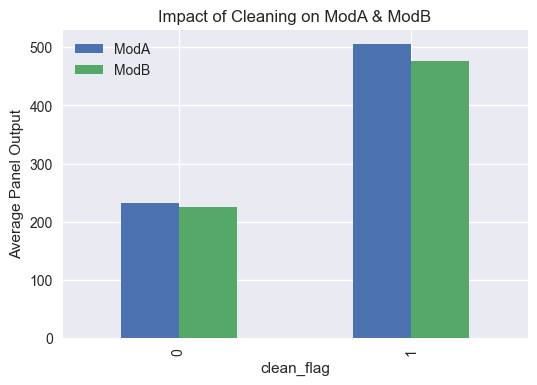

In [14]:
# Group by cleaning flag (0=clean, 1=flagged)
impact = cleaned_df.groupby("clean_flag")[["ModA", "ModB"]].mean()

# Bar plot
impact.plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Panel Output")
plt.title("Impact of Cleaning on ModA & ModB")
plt.show()

#### 8. Correlation & Relationship Analysis
Identify relationships between irradiance, panel temps, and other factors.

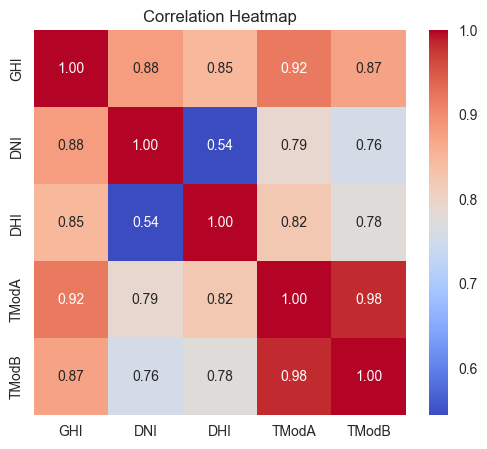

In [15]:
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
corr = cleaned_df[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 8.1 Scatter Plots
Physics:
Wind can slightly cool panels (affects ModA/ModB)
RH influences air temperature measurement and can affect irradiance sensor readings

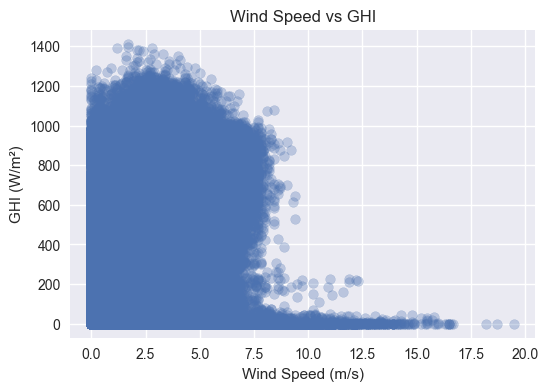

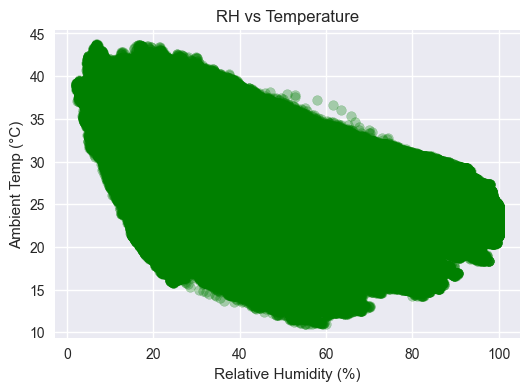

In [17]:
# Wind vs GHI
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df["WS"], cleaned_df["GHI"], alpha=0.3)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI (W/m²)")
plt.title("Wind Speed vs GHI")
plt.show()

# Relative Humidity vs Temperature
plt.figure(figsize=(6,4))
plt.scatter(cleaned_df["RH"], cleaned_df["Tamb"], alpha=0.3, color="green")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temp (°C)")
plt.title("RH vs Temperature")
plt.show()


##### 8.2 Wind & Distribution Analysis
Histogram of Wind Speed:

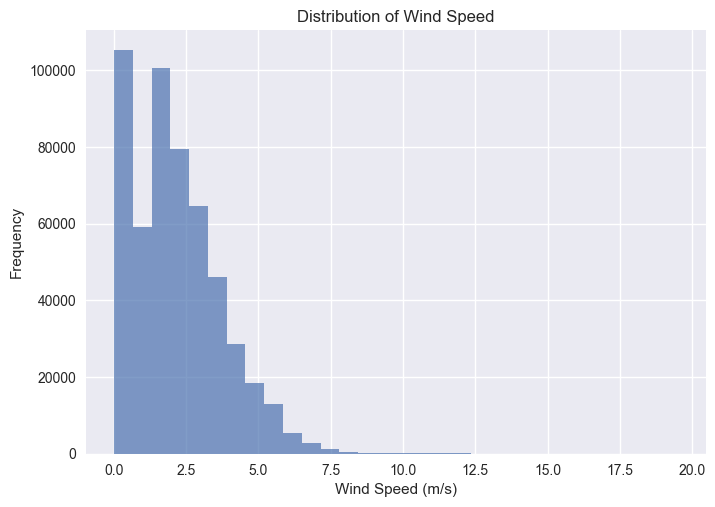

In [18]:
plt.hist(cleaned_df["WS"], bins=30, alpha=0.7)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speed")
plt.show()

##### 8.3 Wind Rose (Directional Visualization) 
Using windrose package
* Physics Insight:
* Understand wind direction & speed distribution
* Useful for panel cooling analysis or microclimate assessment

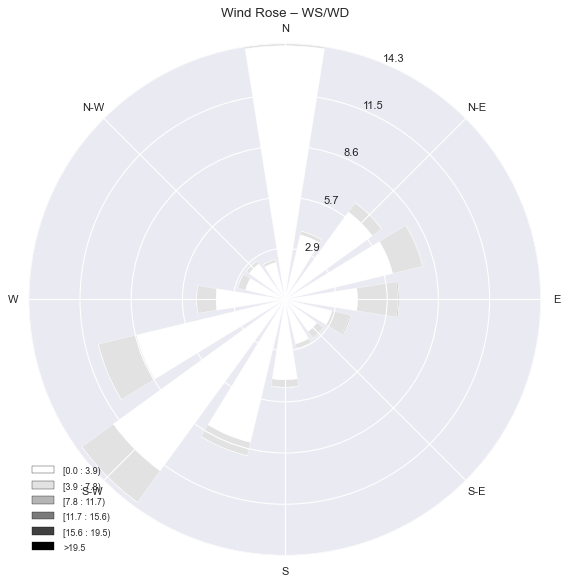

In [ ]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(cleaned_df["WD"], cleaned_df["WS"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose – WS/WD")
plt.show()


#### 9. Histograms for Solar Irradiance

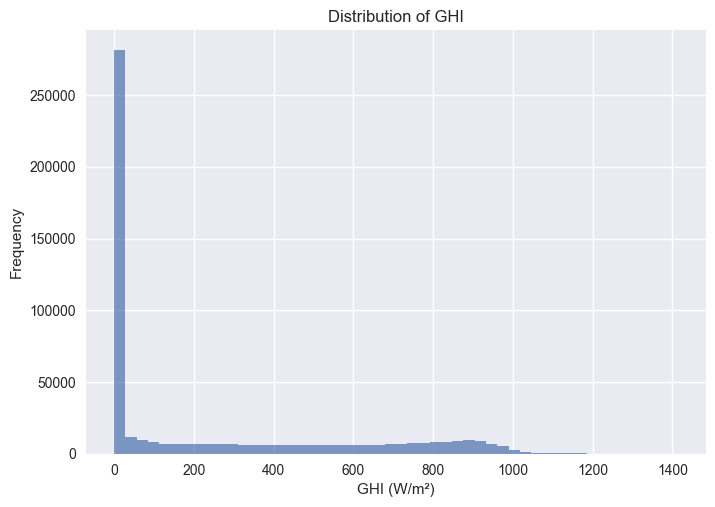

In [21]:
plt.hist(cleaned_df["GHI"], bins=50, alpha=0.7)
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.title("Distribution of GHI")
plt.show()

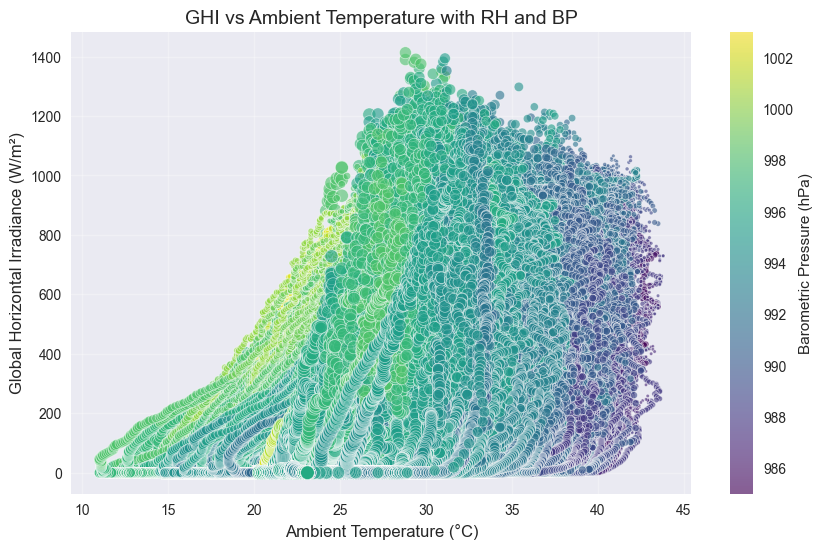

In [25]:
import matplotlib.pyplot as plt

# Bubble chart: GHI vs Tamb
plt.figure(figsize=(10,6))

# x = Tamb, y = GHI
# s = bubble size (RH), c = color (BP)
plt.scatter(
    cleaned_df["Tamb"],          # x-axis: Ambient Temperature
    cleaned_df["GHI"],           # y-axis: Solar Irradiance
    s=cleaned_df["RH"],          # bubble size = Relative Humidity
    c=cleaned_df["BP"],          # color = Barometric Pressure
    cmap="viridis",              # color map
    alpha=0.6,                   # transparency
    edgecolors="w",              # white edges for bubbles
    linewidth=0.5
)

plt.xlabel("Ambient Temperature (°C)", fontsize=12)
plt.ylabel("Global Horizontal Irradiance (W/m²)", fontsize=12)
plt.title("GHI vs Ambient Temperature with RH and BP", fontsize=14)
plt.colorbar(label="Barometric Pressure (hPa)")  # show color legend for BP

# Optional: Add grid for better readability
plt.grid(alpha=0.3)

plt.show()
